# Unit - 04 - Morphological Operators
# Coin Detection - Class Task 

**Name:** Lavanya S    **Reg. No:** 212223230112


In [31]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [41]:
image=cv2.imread('CoinsA.png')

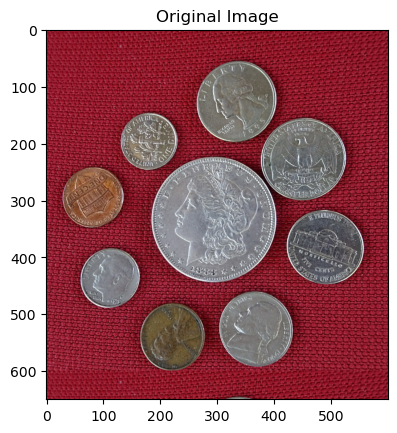

In [42]:
imageCopy = image.copy()
plt.imshow(image[:,:,::-1]);
plt.title("Original Image")
plt.show()

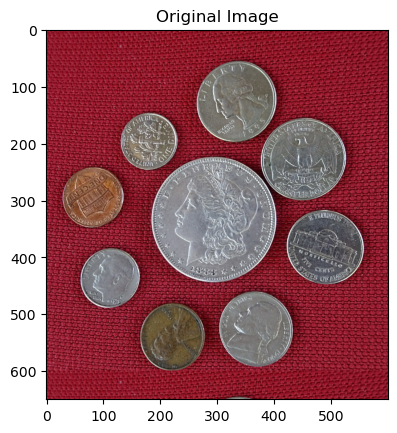

In [43]:
imageCopy = image.copy()
plt.imshow(image[:,:,::-1]);
plt.title("Original Image")
plt.show()
# Expected output

# Convert Image to Grayscale¶

In [44]:
imageGray=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

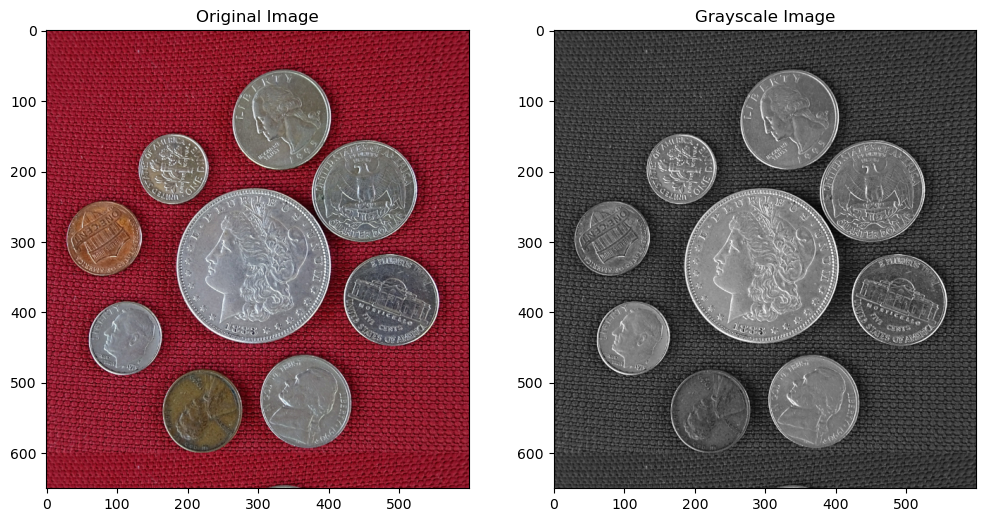

In [45]:
plt.figure(figsize=(12,12))
plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Original Image")
plt.subplot(122); plt.imshow(imageGray,cmap='gray');plt.title("Grayscale Image"); plt.show()
# Expected output

# Split Image into R,G,B Channels

In [46]:
imageB,imageG,imageR=cv2.split(image)

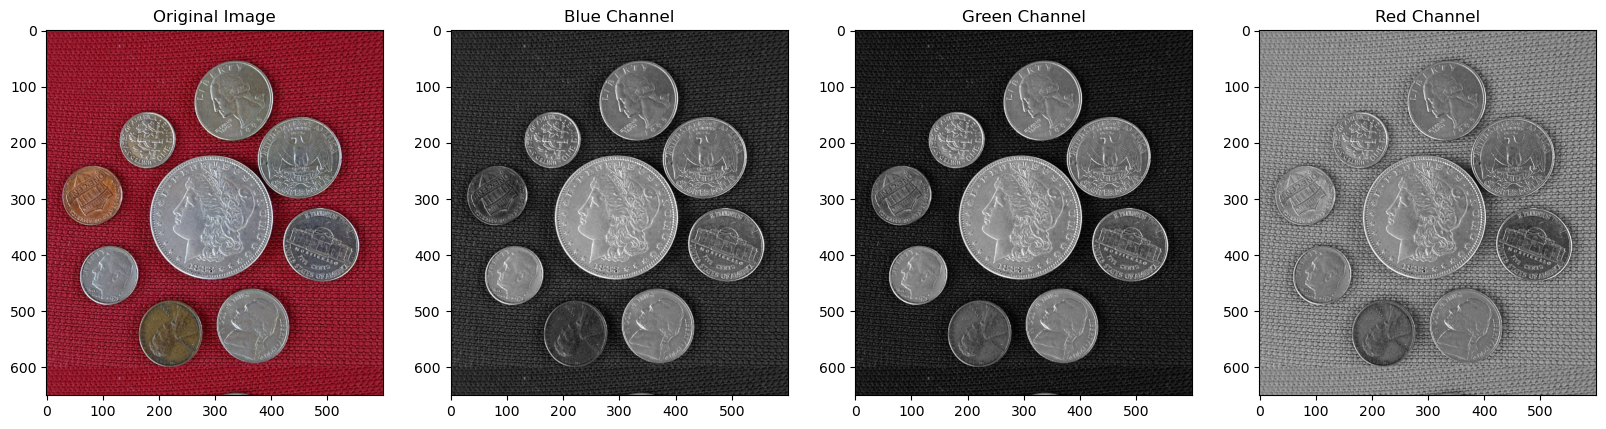

In [47]:
plt.figure(figsize=(20,12))
plt.subplot(141);plt.imshow(image[:,:,::-1]);plt.title("Original Image")
plt.subplot(142);plt.imshow(imageB,cmap='gray');plt.title("Blue Channel")
plt.subplot(143);plt.imshow(imageG,cmap='gray');plt.title("Green Channel")
plt.subplot(144);plt.imshow(imageR,cmap='gray');plt.title("Red Channel");
plt.show()
# Expected output

# Perform Thresholding

In [71]:
th,dst_bin_inv=cv2.threshold(imageG,20,255,cv2.THRESH_BINARY_INV)

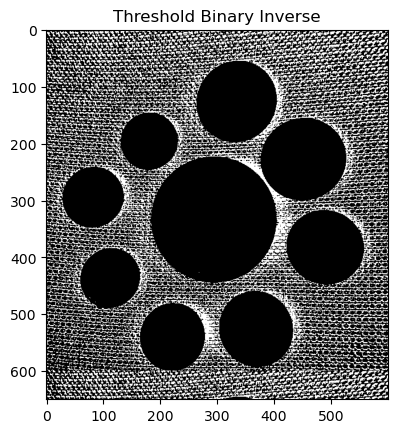

In [72]:
plt.imshow(dst_bin_inv,cmap='gray')
plt.title("Threshold Binary Inverse")
plt.show()

# Perform morphological operations

In [73]:
kSize=(8,8)
kernel1=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,kSize)

In [74]:
imageDilated2 = cv2.dilate(dst_bin_inv,kernel1,iterations=2)


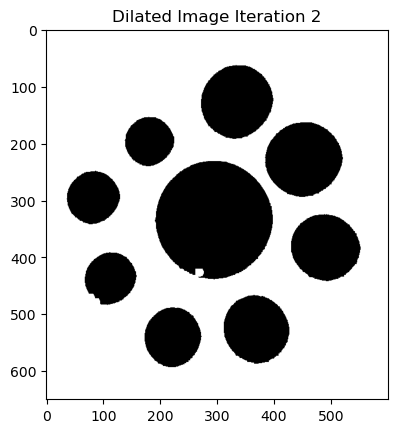

In [75]:
###
### YOUR CODE HERE
###
plt.imshow(imageDilated2,cmap='gray');plt.title('Dilated Image Iteration 2');plt.show()
# Expected output

In [76]:
# Display all the images
# you have obtained in the intermediate steps
###
### YOUR CODE HERE
###
kSize=(11,11)
kernel1=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,kSize)

In [77]:
# Get structuring element/kernel which will be used for dilation
###

### YOUR CODE HERE
###
imageEroded = cv2.erode(imageDilated2,kernel1)


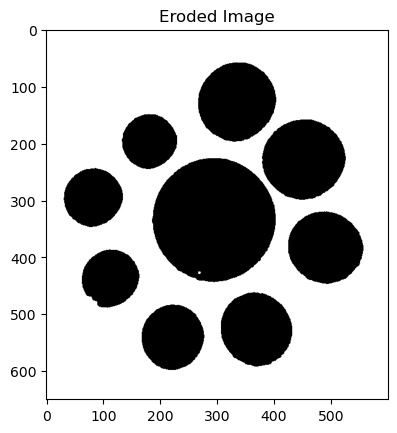

In [78]:
###
### YOUR CODE HERE
###
plt.imshow(imageEroded,cmap='gray');plt.title("Eroded Image");plt.show()
# Expected output

#  Create SimpleBlobDetector

In [79]:
###
### YOUR CODE HERE
###

In [80]:
# Set up the SimpleBlobdetector with default parameters.
params = cv2.SimpleBlobDetector_Params()

params.blobColor = 0

params.minDistBetweenBlobs = 2

# Filter by Area.
params.filterByArea = False

# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.8

# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.8

# Filter by Inertia
params.filterByInertia =True
params.minInertiaRatio = 0.8

In [81]:
# Create SimpleBlobDetector
detector = cv2.SimpleBlobDetector_create(params)

# Detect Coins

In [82]:
# Detect blobs
###
### YOUR CODE HERE
###
keypoints = detector.detect(imageEroded)

In [83]:
# Print number of coins detected
###
### YOUR CODE HERE
###
print(f"Number of coins detected: {len(keypoints)}")

Number of coins detected: 9


In [87]:
for k in keypoints:
    x,y=k.pt
    x=int(round(x))
    y=int(round(y))
    cv2.circle(image, (x,y),5,(255,0,0),-1)
    diameter=k.size
    radius=int(round(diameter/2))
    cv2.circle(image, (x,y), radius, (0,255,0),2)

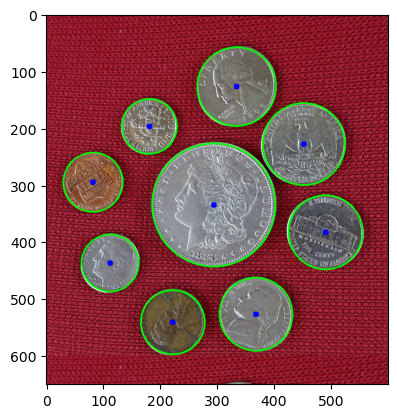

In [88]:
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))